# Problem Statement
* A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

* Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Kaggle link to the dataset: https://www.kaggle.com/datasets/sdolezel/black-friday

In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#loading the CSV train data into a pandas dataframe

bf_train = pd.read_csv('train.csv')
bf_test = pd.read_csv('test.csv')


In [3]:
bf = bf_train.append(bf_test)

In [4]:
print(bf_train.shape)
print(bf_test.shape)
print(bf.shape)

(550068, 12)
(233599, 11)
(783667, 12)


In [5]:
# display the first 5 rows of dataframe

bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
bf.info() #information about the datafrane

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
bf['Occupation'] = bf['Occupation'].astype(object)
bf['Marital_Status'] = bf['Marital_Status'].astype(object)

In [8]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  object 
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  object 
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 77.7+ MB


In [9]:
bf.describe()

,User_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,18.000000,18.000000,23961.000000


In [10]:
def edit_column_name(col_name):
    '''this function replaces the space in a string with an underscore(_)'''
    return col_name.replace(' ','_')


In [11]:
# renaming all the columns

new_col_names = []
for column in bf.columns:
    new_col_names.append(edit_column_name(column.lower()))
    
bf.columns = new_col_names

In [12]:
#sanity

bf.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

In [13]:
# since, user_id is not required, let's drop it

bf.drop(labels=['user_id'], axis=1, inplace=True)

In [14]:
#sanity

bf.head()

,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
bf.isnull().sum()

product_id                         0
gender                             0
age                                0
occupation                         0
city_category                      0
stay_in_current_city_years         0
marital_status                     0
product_category_1                 0
product_category_2            245982
product_category_3            545809
purchase                      233599
dtype: int64

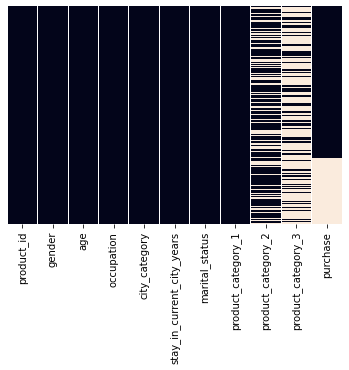

In [16]:
#this heatmap shows the visualization of the NaN values in the dataset

sns.heatmap(bf.isnull(),cbar=False,yticklabels=False)

* Observations: Looks like there are a lot of missing values in the column 'product_category_2','product_category_3'

In [17]:
# missing values percentage

print((bf['product_category_2'].isna().sum()/bf.shape[0])*100)
print((bf['product_category_3'].isna().sum()/bf.shape[0])*100)

31.38858724432699
69.64807756355697


* as the missing values percentage is a lot, we can not remove them all. So, let's replace the missing values with the MODE

In [18]:
#populating the missing values

bf['product_category_2'].fillna(bf['product_category_2'].mode()[0],inplace=True)
bf['product_category_3'].fillna(bf['product_category_3'].mode()[0],inplace=True)

In [19]:
#sanity

print(bf['product_category_2'].isna().sum())
print(bf['product_category_3'].isna().sum())

0
0


In [20]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  783667 non-null  object 
 1   gender                      783667 non-null  object 
 2   age                         783667 non-null  object 
 3   occupation                  783667 non-null  object 
 4   city_category               783667 non-null  object 
 5   stay_in_current_city_years  783667 non-null  object 
 6   marital_status              783667 non-null  object 
 7   product_category_1          783667 non-null  int64  
 8   product_category_2          783667 non-null  float64
 9   product_category_3          783667 non-null  float64
 10  purchase                    550068 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 71.7+ MB


In [21]:
bf['stay_in_current_city_years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

* let's convert 4+ to 4 to make it more convenient for analysis

In [22]:
bf['stay_in_current_city_years'] = bf['stay_in_current_city_years'].str.replace('+','')

In [23]:
#sanity 

bf['stay_in_current_city_years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [24]:
# converting 'stay_in_current_city_years' datatype from object to int

bf['stay_in_current_city_years'] = bf['stay_in_current_city_years'].astype(int)

In [25]:
#sanity 

bf['stay_in_current_city_years'].unique()

array([2, 4, 3, 1, 0])

In [26]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  783667 non-null  object 
 1   gender                      783667 non-null  object 
 2   age                         783667 non-null  object 
 3   occupation                  783667 non-null  object 
 4   city_category               783667 non-null  object 
 5   stay_in_current_city_years  783667 non-null  int32  
 6   marital_status              783667 non-null  object 
 7   product_category_1          783667 non-null  int64  
 8   product_category_2          783667 non-null  float64
 9   product_category_3          783667 non-null  float64
 10  purchase                    550068 non-null  float64
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 68.8+ MB


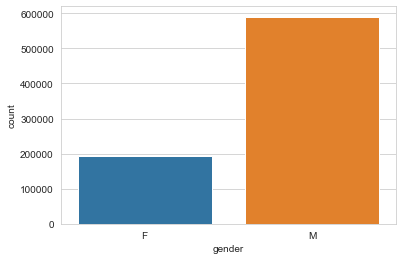

In [44]:
# shoppers by gender
plt.close()
sns.set_style('whitegrid')
sns.countplot(data=bf,x='gender',)
plt.show()

* cleary, Men did a lot of shopping

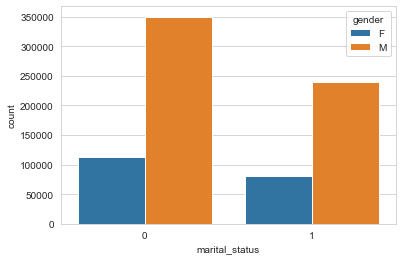

In [45]:
# shoppers by gender and marital status
plt.close()
sns.set_style('whitegrid')
sns.countplot(data=bf,x='marital_status',hue='gender')
plt.show()

* Unmarried men and women did more shopping than married men and women. ABC Pvt.Ltd. must make note of this...

In [46]:
 # top 5 shoppers by occupation
    
bf['occupation'].value_counts()[:5]

4     103086
0      98850
7      84127
1      67687
17     57418
Name: occupation, dtype: int64

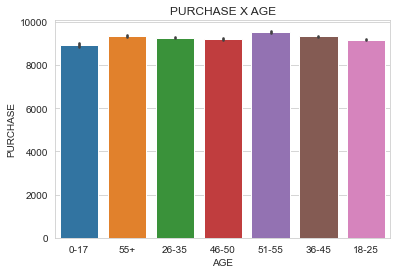

In [30]:
sns.set_style(style='whitegrid')
plt.title('purchase X age'.upper())
sns.barplot(data=bf,x='age',y='purchase')
plt.xlabel(xlabel='AGE')
plt.ylabel('PURCHASE')
plt.show()

In [31]:
bf.age.value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: age, dtype: int64

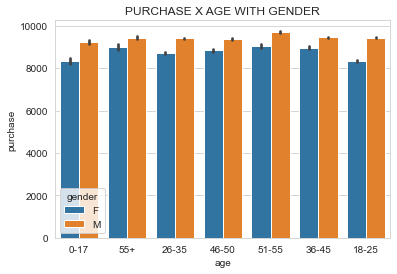

In [47]:
plt.close()
sns.set_style(style='whitegrid')

sns.barplot(data=bf,x='age',y='purchase',hue='gender')
plt.title('purchase X age with gender'.upper())
plt.show()


In [34]:
bf['city_category'].value_counts()

B    329739
C    243684
A    210244
Name: city_category, dtype: int64

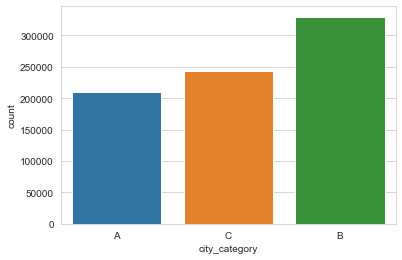

In [35]:
#countplot for city_category
sns.countplot(x=bf['city_category'])

* Observation: city_category B has more entries

In [36]:
#top 10 sold products

bf['product_id'].value_counts()[:10]

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
P00057642    2079
P00184942    2066
P00058042    2014
P00237542    1999
P00145042    1991
Name: product_id, dtype: int64

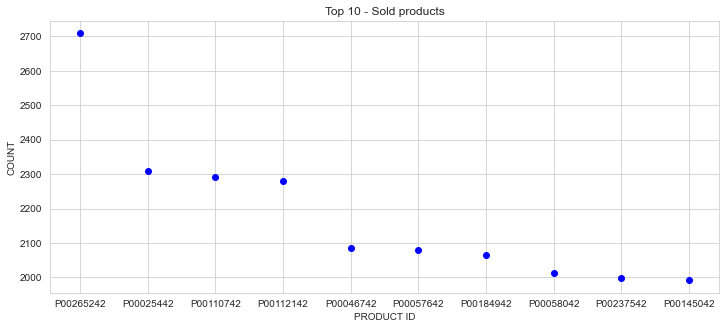

In [49]:
plt.close()
plt.figure(figsize=(12,5))
plt.title('Top 10 - Sold products')
plt.plot(bf['product_id'].value_counts()[:10],'bo')
plt.xlabel('PRODUCT ID')
plt.ylabel('COUNT')
plt.show()

In [38]:
c = dict()
c  = bf['product_id'].value_counts()[:10]
for i, j in c.items():
    print(i)

P00265242
P00025442
P00110742
P00112142
P00046742
P00057642
P00184942
P00058042
P00237542
P00145042
